<a href="https://colab.research.google.com/github/Zhangmingyang-Su/Chris-Su/blob/master/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implemented K-Means

In [0]:
# install package
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random
import numpy as np

In [0]:
# build distance function given x and y two different vectors.
def get_distance(x, y):
    d = sum([(x[i] - y[i]) * (x[i] - y[i]) for i in range(len(x))])
    return d

In [0]:
# k is the number of clusters. 
# center is the array record initial centor point.
def get_center(X, k, center):
        y_pred = []
        for i in range(len(X)):
            distance = []
            for j in range(len(center)):
                # print(center[j])
                distance.append(get_distance(X[i], center[j]))
            y_pred.append(distance.index(min(distance)))  # minimum index element
            # find center points in each of the clusters.
        for i in range(k):
            t = []
            for j in range(len(X)):
                if y_pred[j] == i:
                    t.append(X[j])
            p = []
            for j in range(len(X[0])):
                p.append(sum([x[j] for x in t]) / len(t))
            center[i] = p
        return center

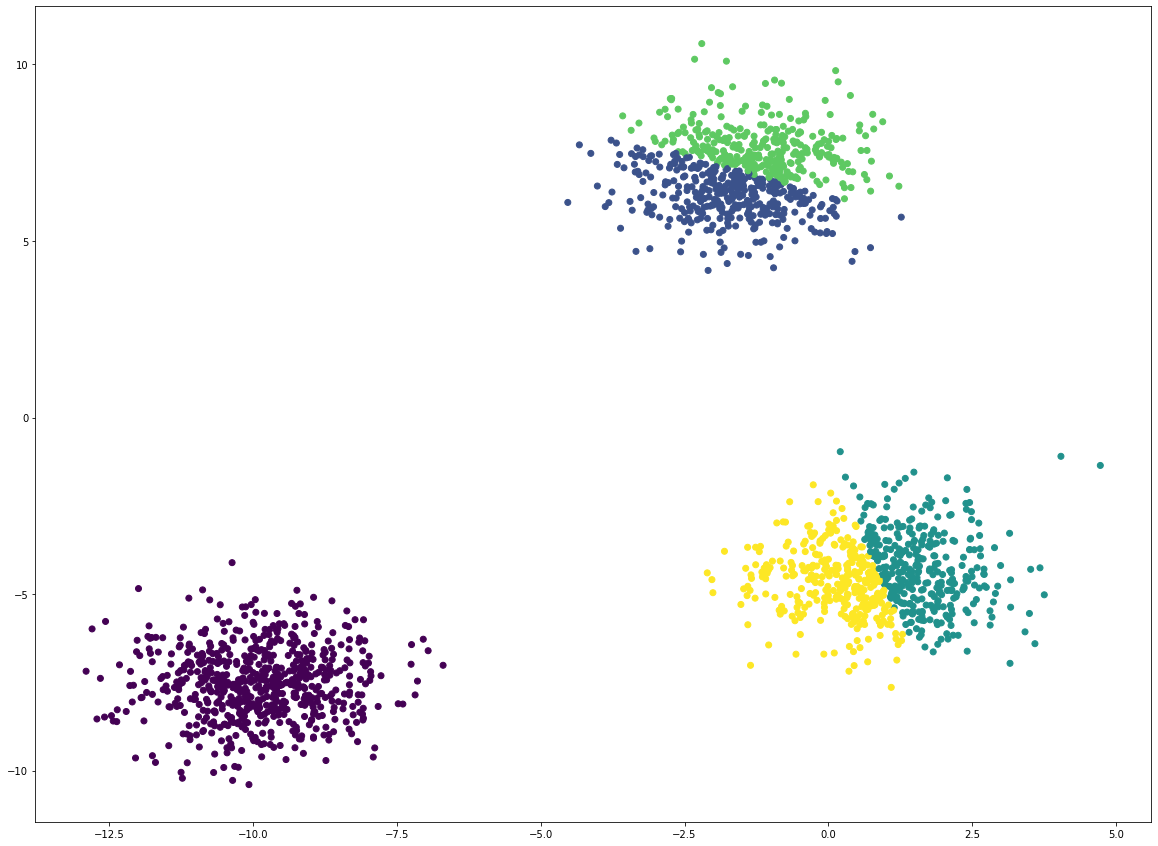

In [9]:
n_samples = 2000  # 样本点数量
random_state = 100
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
k = 5
temp_center = []
for i in range(k):
    # define center points
    temp_center.append(X[random.randint(0, n_samples)])
center = np.array(temp_center)

n = 0
while n < 9:
    center = get_center(X, k, center)
    n = n + 1
last_y = []
for i in range(len(X)):
    last_distance = []
    for j in range(len(center)):
        last_distance.append(get_distance(X[i], center[j]))
    last_y.append(last_distance.index(min(last_distance)))
last_y = np.array(last_y)
# Incorrect number of clusters
# y_pred = KMeans(n_clusters=k, random_state=random_state).fit_predict(X)
plt.figure(figsize=(20, 15))
plt.scatter(X[:, 0], X[:, 1], c=last_y)
plt.show()